In [2]:
%load_ext autoreload
%autoreload 2

%load_ext dotenv
%dotenv

In [3]:
from datetime import date
from llm_agents_introduction.tools.chart_tools import generate_daily_chart
from llm_agents_introduction.alpha_vantage import AlphaVantageService

alpha_vantage = AlphaVantageService.create()

chart = generate_daily_chart(alpha_vantage, "PLAY", date(2010, 1, 1), date(2024, 7, 1))

chart

Uploaded to: https://genai-agents-intro.s3.amazonaws.com/c87c4549-0c65-444b-8254-e407e3f6ea16.png


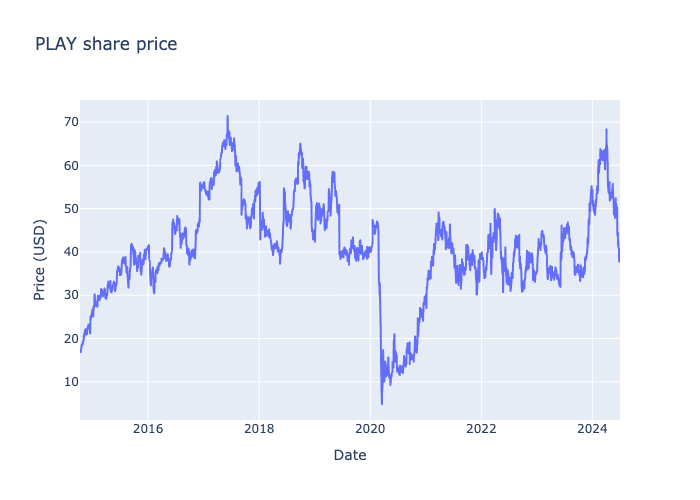

In [4]:
from llm_agents_introduction.tools.chart_tools import upload_chart
from IPython.display import Image

url = upload_chart(chart)
print(f"Uploaded to: {url}")

Image(url)

In [5]:
# work out how to calculate historic market cap
from dataclasses import asdict
import pandas as pd

overview = alpha_vantage.overview("AMZN")
prices = alpha_vantage.fetch_daily_adjusted("AMZN")
splits = alpha_vantage.splits("AMZN")


df = pd.DataFrame([asdict(price) for price in prices])

# start with today's outstanding shares
df["outstanding_shares"] = overview.shares_outstanding

# apply splits to the value of today's outstanding_shares in reverse order
for split in sorted(splits, key=lambda x: x.effective_date, reverse=True):
    df.loc[df["date"] < split.effective_date, "outstanding_shares"] /= split.factor


# calculate market cap on these values
df["market_cap"] = df["close"] * df["outstanding_shares"]

# use a moving average to smooth out the market cap
df["market_cap_ma"] = df["market_cap"].rolling(window=50).mean()

df = df[(df["date"] >= date(2022, 6, 1)) & (df["date"] <= date(2022, 6, 8))]

df

,date,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient,outstanding_shares,market_cap,market_cap_ma
520,2022-06-08,122.610,123.75,120.750,121.18,121.180,64926594,0.0,1.0,1.040660e+10,1.261072e+12,1.261792e+12
521,2022-06-07,122.005,124.10,120.630,123.00,123.000,85156712,0.0,1.0,1.040660e+10,1.280012e+12,1.257775e+12
522,2022-06-06,125.245,128.99,123.810,124.79,124.790,134271125,0.0,20.0,1.040660e+10,1.298640e+12,1.254172e+12
523,2022-06-03,2484.000,2488.00,2420.929,2447.00,122.350,4880166,0.0,1.0,5.203300e+08,1.273248e+12,1.249504e+12
524,2022-06-02,2433.680,2512.20,2400.900,2510.22,125.511,5028034,0.0,1.0,5.203300e+08,1.306143e+12,1.245826e+12
525,2022-06-01,2445.120,2503.58,2412.445,2433.68,121.684,6376449,0.0,1.0,5.203300e+08,1.266317e+12,1.241275e+12


In [15]:
from llm_agents_introduction.tools.chart_tools import generate_market_cap_chart

chart = generate_market_cap_chart(
    alpha_vantage, "AMZN", date(2020, 4, 1), date(2024, 4, 1)
)

chart

In [77]:
from llm_agents_introduction.tools.chart_tools import create_chart_tools

chart_tools = create_chart_tools(alpha_vantage)

for chart_tool in chart_tools:
    display(chart_tool.name)

    url = chart_tool(
        {"symbol": "GOOG", "from_date": "2020-01-01", "to_date": "2024-07-01"}
    )

    display(Image(url=url))

'generate_share_price_chart'

'generate_market_capitalization_chart'